# Code Challenges 
This notebook contains the worked out code challenges from the Udemy linear algebra course. <BR>
CC 51 - 102

In [1]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

---
## Code Challenge 51
Create a geometric transformations via matrix multiplications

In [2]:
# --- Create XY Coordinates for circle
theta = np.linspace(0, 2*np.pi, 100)
circle = np.array( [np.cos(theta), np.sin(theta) ] )

In [37]:
# --- Create 2x2 Matrix
m1 = np.array( [ [1, 0], [0, 1] ])  # Identity Matrix
# --- --- Random 2X2
m2 = np.random.randint( 2, size=(2,2))  # random 2x2 Matrix (ints)
m3 = np.random.randint( 3, size=(2,2))  # random 2x2 Matrix (ints)
m4 = np.random.rand( 2,2)  # random 2x2 Matrix (floats)
m5 = np.random.randint(3)*np.random.rand(2,2)  # random 2x2 Matrix (floats)
# --- --- Singular Matrix
m6 = np.array( [ [1, 1], [2, 2] ])  # Singular Matrix

In [38]:
# --- Matrix Multiply
rc1 = []
rc2 = []
rc3 = []
rc4 = []
rc5 = []
rc6 = []
for x,y,i in zip( circle[0,:], circle[1,:], range(theta.size) ):
    temp = np.array( [x, y] )
    rc1.append( temp@m1 )
    rc2.append( temp@m2 )
    rc3.append( temp@m3 )
    rc4.append( temp@m4 )
    rc5.append( temp@m5 )
    rc6.append( temp@m6 )

In [39]:
# --- Change into an array and transpose
transforms = {}
rc1 = np.array( rc1 )
transforms["Identity"] = rc1.T
rc2 = np.array( rc2 )
transforms["Rand, Int, 1"] = rc2.T
rc3 = np.array( rc3 )
transforms["Rand, Int, 2"] = rc3.T
rc4 = np.array( rc4 )
transforms["Rand, Float, 1"] = rc4.T
rc5 = np.array( rc5 )
transforms["Rand, Float, 2"] = rc5.T
rc6 = np.array( rc6 )
transforms["Singular"] = rc6.T

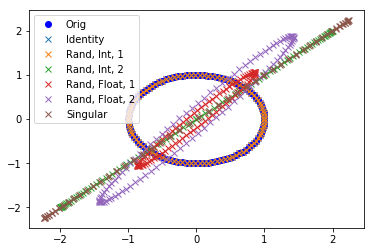

In [40]:
fig = plt.figure()
plt.plot( circle[0,:], circle[1,:], 'bo', label='Orig' )
for name, rc in transforms.items():
    plt.plot( rc[0,:], rc[1,:], "x", label=name)
plt.legend()
plt.show()

---
## Code Challenge 55
Create two symetric<br>
Compute sum, multiplication, and Hadamard multiplication<br>
Determine if the results are still symetric

In [2]:
# --- Create Two Symetric Matrices
m = 4
n = 3

A = np.random.randint( -10, 10, size=(3,4) )
B = np.random.randint( -5, 5, size=(4,3) )

# --- --- Make Symetric by Multiply
S1 = A@A.T
S2 = B.T@B

In [7]:
# --- Compute Sum and test symetry
SA1 = S1+S2
print( "A+B Matrix" )
print( SA1 == SA1.T )
SB1 = S2+S1
print( "B+A Matrix" )
print( SB1 == SB1.T )

A+B Matrix
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
B+A Matrix
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [8]:
# --- Compute Multiplication and test symetry
SA2 = S1@S2
print( "A@B Matrix" )
print( SA2 == SA2.T )
SB2 = S2@S1
print( "B@A Matrix" )
print( SB2 == SB2.T )

A@B Matrix
[[ True False False]
 [False  True False]
 [False False  True]]
B@A Matrix
[[ True False False]
 [False  True False]
 [False False  True]]


In [9]:
# --- Compute Hadamard and test symetry
SA3 = S1*S2
print( "A*B Matrix" )
print( SA3 == SA3.T )
SB3 = S2*S1
print( "B*A Matrix" )
print( SB3 == SB3.T )

A*B Matrix
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
B*A Matrix
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


---
## Code Challenge 57 - Standard and Hadamard Multiplication of Diagonal Matrices
Create two matricies (4x4) both "Full" and Diagonal<br>
Multiply each matrix by itself (A\*A) both matrix and Hadamard.

In [4]:
# --- Create 2 (4x4)
A = np.random.randint( -10, 10, size=(4,4) )
B = np.random.randint( -10, 10, size=(4,4) )

# --- Diagnolize 
B = np.diag( np.matrix.diagonal( B ) )
print( B )

[[  9   0   0   0]
 [  0 -10   0   0]
 [  0   0   8   0]
 [  0   0   0  -1]]


In [6]:
# --- Matrix Multiply
MA = A@A
print( "Matrix Multiply A: ")
print( MA )

MB = B@B
print()
print( "Matrix Multiply B: ")
print( MB )

Matrix Multiply A: 
[[ -70  -76 -122  -46]
 [  16  -36  -20   31]
 [  56   11  -15  -45]
 [  47   29   86  -60]]

Matrix Multiply B: 
[[ 81   0   0   0]
 [  0 100   0   0]
 [  0   0  64   0]
 [  0   0   0   1]]


In [7]:
# --- Hadamard Multiply
HA = A*A
print( "Hadamard Multiply A: ")
print( MA )

HB = B*B
print()
print( "Hadamard Multiply B: ")
print( HB )

Hadamard Multiply A: 
[[ -70  -76 -122  -46]
 [  16  -36  -20   31]
 [  56   11  -15  -45]
 [  47   29   86  -60]]

Hadamard Multiply B: 
[[ 81   0   0   0]
 [  0 100   0   0]
 [  0   0  64   0]
 [  0   0   0   1]]


---
# Code Challenge 58 - Fourier Matrix
Create a Fourier matrix where:<br>
$$Fjk=\omega^m$$
$$\omega=exp^{-2\pi j/n}$$
$$m=(j-1)(k-1)$$
Plot the magitude of the $X = Fx$<br>
Plot the 

In [36]:
# --- Create 10x10 matrix
j = 100 # rows
k = 100 # columns

F = np.zeros( shape=(j,k) )

In [37]:
# --- Create omega
omega = np.exp( (-2*np.pi*1j)/F.shape[0] )

In [38]:
# --- Build the array per the function
for r in range(F.shape[0]):
    for c in range(F.shape[1]):
        m = (r+1-1.0)*(c+1-1.0)
        F[r,c]=omega**m

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


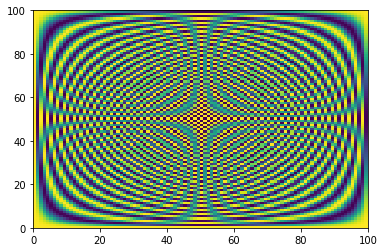

In [46]:
# --- Plot Magnitude of F
# --- --- flatten F
#temp = F.flatten()
plt.figure()
plt.pcolormesh( F.real )
plt.show()

In [47]:
# --- Create a random (10x10 Matrix)
x = np.random.rand( j ) ## --- THIS SHOULD BE A VECTOR!! 
# --- Multiply by F
X = F@x

In [48]:
# --- Run FFT on x
X_FFT = np.fft.fft( x )

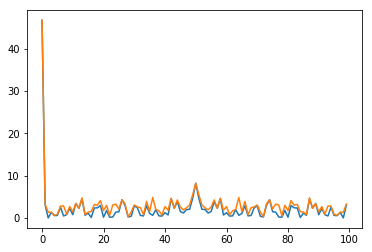

In [50]:
# --- Plot Magnitude of X
# --- --- flatten X
X1 = X.flatten()
X2 = X_FFT.flatten()
plt.figure()
plt.plot( abs(X1) )
plt.plot( abs(X2) )
plt.show()

---
## Code Challenge 65 - Reduced Rank Matrix by Matrix Multiplication
Create a reduced rank matrix using matrix multiplication.<br>
Create a 10x10 matrix with rank=4 (use matrix multiplication).

In [3]:
# --- Create 10x10 matrix and test rank
m = 10
A = np.random.randint( 100, size=(m,m) )
r_A = np.linalg.matrix_rank( A )
print( "A: ")
print(A)
print( "Rank of A: {}".format(r_A) )

A: 
[[49 99 86 31 64 76 73 24 43 50]
 [ 0 20  6 48 81 35 84 42 56 57]
 [ 3 21 11 56 27 62 52 48 31  6]
 [48 68  9 92 98 75 92 51 52 53]
 [ 6 38 33 80 11 66 25 74 75 90]
 [13 86 75 59 64 67 34  6 41 52]
 [56 50 47 37 10 85  8 74 57 65]
 [69 72 30 91 66 79 33 32 97 98]
 [26 60 79  1 63  9 95 81 63 99]
 [94 41 96  3 98 84 90 13 81 79]]
Rank of A: 10


In [19]:
# --- Create a rank 4 matrix by matrix multiplication
# --- first make a 1's matrix
B = np.ones( (m,m) )
# --- Then zero out the last 6 columns
B[:,4:10] = 0
print("B: ")
# --- Take the diagonal
B = np.diag( np.matrix.diagonal( B ) )
print(B)

B: 
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
# --- Multiply
print("Rank of AB: {}".format(np.linalg.matrix_rank(B@A)))
print("AB: {}".format(A@B))

Rank of AB: 4
AB: [[49. 99. 86. 31.  0.  0.  0.  0.  0.  0.]
 [ 0. 20.  6. 48.  0.  0.  0.  0.  0.  0.]
 [ 3. 21. 11. 56.  0.  0.  0.  0.  0.  0.]
 [48. 68.  9. 92.  0.  0.  0.  0.  0.  0.]
 [ 6. 38. 33. 80.  0.  0.  0.  0.  0.  0.]
 [13. 86. 75. 59.  0.  0.  0.  0.  0.  0.]
 [56. 50. 47. 37.  0.  0.  0.  0.  0.  0.]
 [69. 72. 30. 91.  0.  0.  0.  0.  0.  0.]
 [26. 60. 79.  1.  0.  0.  0.  0.  0.  0.]
 [94. 41. 96.  3.  0.  0.  0.  0.  0.  0.]]


In [6]:
""" I GOT THIS WRONG... THIS IS NOT THE INTENDED WAY OF DOING IT!

    The goal of the exercise was to remind us about the rules of Matrix multiplication and rank.
    Recall... A matrix size is determine as the outer dimensions of the two matrices:
            mXn * nXp results in a mXp matrix
    Recall... A matrix rank is at most the SMALLER of the dimensions...
    
    So... here is how it should be done
"""
# --- Make a Rank-4 Matrix
m = 10 # No. of Rows 
B = np.random.randint(100, size=(m,4) )
print("B: ")
print(B)

B: 
[[41 21 68 65]
 [ 1  6  4 30]
 [42 33 52 69]
 [25 86 19 29]
 [87 65 61 24]
 [88 61  6 53]
 [68 87 78 77]
 [52 17 73 86]
 [79 50 83 66]
 [28 78 95  9]]


In [8]:
# --- Now make a 10x10 Matrix w/ Matrix Math
A = np.random.randint(100, size=(4,m) )
print("Rank of AB: {}".format(np.linalg.matrix_rank(B@A)))
print("AB: {}".format(B@A))

Rank of AB: 4
AB: [[15107  9861  5206  5808  3110  7930  4935 10598  6106  6019]
 [ 2597  3073   652  1034   688  2007   847  3042  1476   744]
 [14288 10518  4598  6314  3602  8967  4830 10272  6522  6341]
 [ 8509 10367  3274  6281  4956 10068  4991  5233  4280  7808]
 [17331 10029  5652  9801  5506 12149  6237  7889  8230 10677]
 [13968  9704  2790  9724  5250 12581  4172  7524  9522  8671]
 [21262 16812  7422 10868  6910 15565  8484 13574  9502 12159]
 [17854 11426  5704  6875  3438  9276  5348 12925  7766  6533]
 [20972 13045  6940  9779  5336 12701  7063 12560  9292 10269]
 [14476 11290  7194  6523  5016  9555  7588  7467  3504  9962]]


In [17]:
# --- Make Generic
# --- --- Define random row, columns, and rank
rows = np.random.randint(1, high=100)
cols = np.random.randint(1, high=100)
r = np.random.randint(1, high=np.min([rows,cols]))
# --- --- Define new matrix
C = np.random.randint(100, size=(rows,r) ) @ np.random.randint(100, size=(r,cols) )
# --- --- Check
print("Rank of C: {c}\nRows = {rws}\nCols: {cols}\nExpected Rank: {rk}".format(c=np.linalg.matrix_rank(C), rws=rows, cols=cols, rk=r) )

Rank of C: 46
Rows = 77
Cols: 73
Expected Rank: 46


---
## Code Challenge 66 - Scalar Multiplication and Rank
Is rank a linear function?<br>
* Create two matrices, full-rank and reduced-rank.
* Create a scalar, lambda
* Print the rank of the: full-rank, reduced-rank, lambda \* full, lambda \* reduced
* Test rank(lambda \* full or reduced) == lambda * rank( full or reduced )

In [2]:
# --- Create the two matrices
F = np.random.randint( 100, size=(10,6) )
R = np.random.randint(100, size=(7,4) ) @ np.random.randint(100, size=(4,9) )

In [3]:
# --- Create a scalar
lamb = np.random.randint(100)

In [4]:
# --- Print all the ranks
print("Rank for F: {}".format(np.linalg.matrix_rank(F)))
print("Rank for R: {}".format(np.linalg.matrix_rank(R)))
print("Rank for lambda*F: {}".format(np.linalg.matrix_rank(lamb*F)))
print("Rank for lambda*R: {}".format(np.linalg.matrix_rank(lamb*R)))

Rank for F: 6
Rank for R: 4
Rank for lambda*F: 6
Rank for lambda*R: 4


In [6]:
# --- Test for linearity
print( "Linear? {}".format( np.linalg.matrix_rank(lamb*F) == lamb*np.linalg.matrix_rank(F) ))
print( "Linear? {}".format( np.linalg.matrix_rank(lamb*R) == lamb*np.linalg.matrix_rank(R) ))

Linear? False
Linear? False


---
## Code Challenge 68 - Rank of Multiplied and Summed Matricies 
Goal is to test rules:
* Rank of AB <= min( rank(A), rank(B) )
* Rank of A+B <= rank(A) + rank(B)

The steps will be to:
1. Generate two matrices (A and B), 2x5
2. Compute A'A and B'B
3. Find their ranks
4. find ranks of A'A and B'B
5. Test rank rules with A'A and B'B

In [29]:
# --- Generate two matrices (A & B), 2x5
m=2  # rows
n=5  # cols
A = np.random.randint( 10, size=(m,n) )
B = np.random.randint( 10, size=(m,n) )

In [30]:
# --- Compute the X'X (making symetric matrices)
AtA = A.T@A
BtB = B.T@B

In [31]:
# --- Compute the X+X 
AB = AtA @ BtB
ApB = AtA + BtB

In [32]:
# --- Compute Ranks
print("Rank of A: {}".format(np.linalg.matrix_rank(A) ) )
print("Rank of B: {}".format(np.linalg.matrix_rank(B)) )
print("Rank of AtA: {}".format(np.linalg.matrix_rank(AtA)) )
print("Rank of BtB: {}".format(np.linalg.matrix_rank(BtB)) )
print("Rank of AB: {}".format(np.linalg.matrix_rank(AB)) )
print("Rank of ApB: {}".format(np.linalg.matrix_rank(ApB)) )

Rank of A: 2
Rank of B: 2
Rank of AtA: 2
Rank of BtB: 2
Rank of AB: 2
Rank of ApB: 4


---
## Code Challenge 70 - Is this vector in the span of the set?
Determine if vector: [1 2 3 4]<br>
is in the span of either set:<br>
[ [4 3 6 2] [0 4 0 1] ]<BR>
[ [1 2 2 2] [0 0 1 2] ]<BR>

In [33]:
# --- Create Vector and Sets
v = np.array( [1, 2, 3, 4,] )
S = np.array( [ [4, 3, 6, 2,], [0, 4, 0, 1,], ] )
T = np.array( [ [1, 2, 2, 2,], [0, 0, 1, 2,], ] )

In [35]:
# --- My Guess... If I add vector v to the sets, if it is contained in the span, then the rank shouldn't change...
_s = list(S)
_s.append(v)
Sv = np.array( _s )

_t = list(T)
_t.append(v)
Tv = np.array( _t)

In [36]:
# --- Check Ranks
print("Rank of S: {}".format( np.linalg.matrix_rank(S) ) )
print("Rank of Sv: {}".format( np.linalg.matrix_rank(Sv) ) )

print("Rank of T: {}".format( np.linalg.matrix_rank(T) ) )
print("Rank of Tv: {}".format( np.linalg.matrix_rank(Tv) ) )

Rank of S: 2
Rank of Sv: 3
Rank of T: 2
Rank of Tv: 2


---
## Code Challenge 86: Reduced Row Echealon Form of matrices with difference size and ranks
- Create the following random matrices:
 - square
 - retangular (tall, wide)
 - loser (column, rows)
- Compute the RREF

In [3]:
# --- Make Random Integer matrices
# --- --- Square
m = 5
sq = np.random.randint(-10,10,size=(m,m))
# --- --- Rectangle
n = 3
tall = np.random.randint(-10,10,size=(m,n))
wide = np.random.randint(-10,10,size=(n,m))

In [31]:
""" THIS IS NOT THE WAY TO DO IT FOR THIS EXAMPLE
# --- Make reduced rank matrix using generic way
# --- --- Define random row, columns, and rank
rows = 3 # change this to reduce rank the cols
cols = 4 # Change this to reduce rank the rows
r = np.random.randint(1, high=np.min([rows,cols]))
# --- --- Define new matrix
C = np.random.randint(10, size=(rows,r) ) @ np.random.randint(10, size=(r,cols) )
"""
C = np.random.randint(-10,10,size=(m,m))
# --- Columns
#C[:,3] = C[:,2]
# --- Rows
C[1,:] = C[2,:]

In [8]:
# --- Inorder to get the rref function you need to import smypy
from sympy import *

In [12]:
# --- Use sympy function Matrix
SQ = Matrix( sq )
TALL = Matrix( tall )
WIDE = Matrix( wide )

In [32]:
ROWS = Matrix( C )

In [30]:
COLS = Matrix( C)

In [33]:
# --- Use sympy Reduced Row Echelon Form function (rref)
print("SQUARE")
print(SQ.__repr__())
print()
temp = SQ.rref()
print( np.array(temp[0]) )
print("---------------------------")

print("TALL")
print(TALL.__repr__())
print()
temp = TALL.rref()
print( np.array(temp[0]) )
print("---------------------------")

print("WIDE")
print(WIDE.__repr__())
print()
temp = WIDE.rref()
print( np.array(temp[0]) )
print("---------------------------")

print("RR COLS")
print(COLS.__repr__())
print()
temp = COLS.rref()
print( np.array(temp[0]) )
print("---------------------------")

print("RR ROWS")
print(ROWS.__repr__())
print()
temp = ROWS.rref()
print( np.array(temp[0]) )
print("---------------------------")

SQUARE
Matrix([
[-9,  5,  -4, -9,  2],
[-3, -6,   8,  7,  2],
[-8,  4, -10, -5,  8],
[ 3,  6,   0, -4, -9],
[-5,  0,  -7, -9, -8]])

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
---------------------------
TALL
Matrix([
[ -4,  -7,  4],
[ -8,  -2,  5],
[  7,  -7, -2],
[-10, -10,  8],
[ -2,   8, -2]])

[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]
 [0 0 0]]
---------------------------
WIDE
Matrix([
[0, 0,  8, -6,  9],
[7, 4, -3, -9, -8],
[0, 2, -9,  1, -4]])

[[1 0 0 1/28 -135/56]
 [0 1 0 -23/8 49/16]
 [0 0 1 -3/4 9/8]]
---------------------------
RR COLS
Matrix([
[ 2, -7, -4, -4,  3],
[-2,  9,  3,  3,  2],
[ 3, -1,  9,  9,  5],
[-4, -5, -5, -5, -8],
[ 1, -6,  9,  9,  5]])

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 1 0]
 [0 0 0 0 1]
 [0 0 0 0 0]]
---------------------------
RR ROWS
Matrix([
[6, -9, -5, -6,  3],
[2, -8, -1, -7,  0],
[2, -8, -1, -7,  0],
[9, -8,  7,  9,  4],
[8,  3, -2, -4, -1]])

[[1 0 0 0 236/2509]
 [0 1 0 0 -59/193]
 [0 0 1 0 -1176/2509]
 [0 0 0 1 1112/2509]
 [0 0 0 

## Code Challenge 92 - Compute the determinate for small and large matrices
Test that a singular matrix (reduced-rank matrix) has a determinant of 0.
* ""1st""
* Generate a 2x2 matrix of integergs with linear dependancies
* Compute the rank and determinant
* '''2nd'''
* Generate mxm matrices with linear dependancies
* Compute the rank and determinant

In [7]:
# 2x2 Matrix with linear dependancies
n = 2
A = np.random.randint( -10, 10, size=(n,n) )
A[:,n-1] = 3*A[:,0]
print(A)

[[ -4 -12]
 [  7  21]]


In [10]:
# Check that it is zero...
print("The rank of A: {r}\nThe determinate of A: {d}".format(
    r=np.linalg.matrix_rank(A),
    d=np.linalg.det(A), 
    )
)

The rank of A: 1
The determinate of A: 4.662936703425667e-15


In [48]:
# --- Make reduced rank matrix using generic way
# --- --- Define random row, columns, and rank
rows = 12 # change this to reduce rank the cols
cols = 11 # Change this to reduce rank the rows
r = np.random.randint(1, high=np.min([rows,cols]))
# --- --- Define new matrix
#C = np.random.randint(10, size=(cols,r) ) @ np.random.randint(10, size=(r,cols) )
C = np.random.randint(10, size=(rows,r) ) @ np.random.randint(10, size=(r,rows) )
print("C\n{}".format(C))
print("The rank of C: {r}\nThe determinate of C: {c}".format(
    r=np.linalg.matrix_rank(C),
    c=np.linalg.det(C),
    )
)

C
[[ 50  78 129  48  95 117  98 104  72  85 112  58]
 [168 240 359 260 232 285 230 241 218 239 161 184]
 [108 180 254 195 187 221 210 205 164 160 136 141]
 [ 94 161 254 131 211 227 191 201 127 155 151 142]
 [215 256 317 224 255 360 267 276 201 272 239 196]
 [191 240 360 211 265 331 292 296 230 275 260 194]
 [196 259 385 223 284 322 277 296 256 257 239 216]
 [165 221 308 196 238 321 242 254 167 232 188 167]
 [158 197 252 204 169 256 195 209 156 206 146 139]
 [193 243 312 207 215 273 173 227 198 216 175 189]
 [146 237 292 193 218 313 197 245 139 195 192 162]
 [167 210 344 179 217 260 219 227 238 233 231 159]]
The rank of C: 9
The determinate of C: -9.74079571821443e-28


---
## Code Challenge 94 - Large Matrices with Row Exchanges 

* Generate a 6x6 Matrix
* Compute the determinant
* Swap one row, compute determinant
* Swap two rows, compute determinant

In [17]:
# -- Generate 6x6 matrix
m = 6
A = np.random.randint(-10,10,size=(m,m))
print("A\n{}".format(np.matrix.view(A)))
print("Determinate of A = {}".format(np.linalg.det(A)))

A
[[ -3   6   3   2 -10  -5]
 [ -7   6   7   6   5  -1]
 [ -6  -7  -1   3   2   3]
 [  2  -8   0 -10   4   1]
 [ -9 -10   5  -7  -4   6]
 [ -5 -10   3  -1  -4 -10]]
Determinate of A = 459462.00000000006


In [18]:
import copy # -- Needed to make a deep copy of a row otherwise you are just going to make two of the same rows
# -- Swap 1 row
B = copy.deepcopy(A)
temp = copy.deepcopy(B[1,:])
B[1,:] = B[0,:]
B[0,:] = temp
print("B\n{}".format(np.matrix.view(B)))
print("Determinate of B = {}".format(np.linalg.det(B)))

B
[[ -7   6   7   6   5  -1]
 [ -3   6   3   2 -10  -5]
 [ -6  -7  -1   3   2   3]
 [  2  -8   0 -10   4   1]
 [ -9 -10   5  -7  -4   6]
 [ -5 -10   3  -1  -4 -10]]
Determinate of B = -459462.00000000006


In [20]:
# -- Swap 2 rows
C = copy.deepcopy(A)
temp1 = copy.deepcopy(C[1,:])
C[1,:] = C[0,:]
C[0,:] = temp1

temp2 = copy.deepcopy(C[-1,:])
C[-1,:] = C[-2,:]
C[-2,:] = temp2

print("C\n{}".format(np.matrix.view(C)))
print("Determinate of C = {}".format(np.linalg.det(C)))

C
[[ -7   6   7   6   5  -1]
 [ -3   6   3   2 -10  -5]
 [ -6  -7  -1   3   2   3]
 [  2  -8   0 -10   4   1]
 [ -5 -10   3  -1  -4 -10]
 [ -9 -10   5  -7  -4   6]]
Determinate of C = 459462.00000000006


In [23]:
# --- Column swap for fun! 
# -- Swap 1 column
D = copy.deepcopy(A)
temp1 = copy.deepcopy(D[:,1])
D[:,1] = D[:,0]
D[:,0] = temp1

temp2 = copy.deepcopy(D[:,-1])
D[:,-1] = D[:,-2]
D[:,-2] = temp2

print("D\n{}".format(np.matrix.view(D)))
print("Determinate of D = {}".format(np.linalg.det(D)))

D
[[  6  -3   3   2  -5 -10]
 [  6  -7   7   6  -1   5]
 [ -7  -6  -1   3   3   2]
 [ -8   2   0 -10   1   4]
 [-10  -9   5  -7   6  -4]
 [-10  -5   3  -1 -10  -4]]
Determinate of D = 459462.00000000006


---
## Code Challenge 96 - Determine shift effect on determinate
* Generate a random square matrix (20x20)
* impose a linear dependence
* "Shift" the matrix using a lambda of: 0.0 -> 0.1
* compute the abs(determinate) of the shifted matrix
* repeat 1000 times and take the average
* plot the determinate as a function of lambda

In [16]:
# Test generating random 20x20 matrix with a shift
n=5
A = np.random.random(size=(n,n))
S = 0.1*np.identity(n, dtype=int)
AS = A+S
print("Shift Test...")
print("A\n{}".format(np.matrix.view(A)))
print("det(A) = {}".format(np.linalg.det(A)))
print("Shift Matrix\n{}".format(np.matrix.view(S)))
print("Shifted A\n{}".format(np.matrix.view(AS)))
print("det(AS) = {}".format(np.linalg.det(AS)))

Shift Test...
A
[[0.9202906  0.65368163 0.22993743 0.03907248 0.11752011]
 [0.99609644 0.03919567 0.86455416 0.51367583 0.31930976]
 [0.52354834 0.90236091 0.23179714 0.61177336 0.84966204]
 [0.69116439 0.00563505 0.62852739 0.18635982 0.61867859]
 [0.72742839 0.84271654 0.86872075 0.58128272 0.37877531]]
det(A) = -0.19981731130201438
Shift Matrix
[[0.1 0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0. ]
 [0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.1]]
Shifted A
[[1.0202906  0.65368163 0.22993743 0.03907248 0.11752011]
 [0.99609644 0.13919567 0.86455416 0.51367583 0.31930976]
 [0.52354834 0.90236091 0.33179714 0.61177336 0.84966204]
 [0.69116439 0.00563505 0.62852739 0.28635982 0.61867859]
 [0.72742839 0.84271654 0.86872075 0.58128272 0.47877531]]
det(AS) = -0.13076180314058058


In [17]:
#Create a nested loop to cycle through shifts
n=20 
lambdas = np.linspace(0.0,0.1,num=100)
avg_det = np.zeros(100)
for l,idx in zip(lambdas,range(100)):
    det = 0
    for i in range(1000):
        A=np.random.random(size=(n,n))
        A[:,1] = A[:,10] # linear dependence
        S = l*np.identity(n)
        det += abs(np.linalg.det((A+S)))
    avg_det[idx] = det/1000

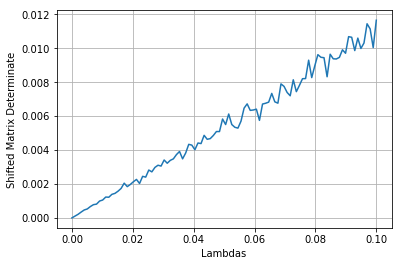

In [18]:
# plot the results...
fx, ax = plt.subplots()
ax.plot(lambdas, avg_det)
ax.grid("on",which="both")
ax.set_xlabel ("Lambdas")
ax.set_ylabel("Shifted Matrix Determinate")
plt.show()

___
## Code Challenge 103 - Implement the MCA Algorithim
In this code challenge, we need to implement the MCA algorithim for determining the inverse.<br><br>
Here are the steps if you forgot...
* Compute the determinant
* Compute the Minors Matrix
* Compute the Cofactors matrix and perform Hadamard multiplication
* Compute the Adjugate matrix by transposing the cofactors matrix and dividing all elements by the determinant of the original matrix
* Check! 

In [53]:
# Create a random Matrix
m = int(20*np.random.random())
A = np.random.randint(-10,10,size=(m,m))
print("A = \n{}".format(np.matrix.view(A)))

A = 
[[-10   8  -6  -6   0]
 [  9 -10   0  -8   9]
 [  4   5  -8   5  -5]
 [  2  -9  -1  -3  -3]
 [  1  -9   2   6   3]]


In [54]:
# Step 1: Compute the determinant
det_A = np.linalg.det( A )
print("Determinant of A = {}".format(det_A))

Determinant of A = -157828.0000000001


In [55]:
# Step 2: Compute the Minors Matrix
# The Minors Matrix is determined by calculating the determinant of the matrix inside the larger
# made up of the elements not included in the row and column of the matrix position... confusing I know...
M = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        # list of each row in new matrix
        R = np.array( [A[k,:] for k in range(m) if k!=i] ) 
        # list of each column in new matrix
        minor = np.array( [R[:,l] for l in range(m) if l!=j] )
        # This results in a transposed matrix... so, we need to transpose it to get it in the right position for the determinat 
        M[i,j] = np.linalg.det(minor.T)
#print("M = \n{}".format(np.matrix.view(M)))

In [56]:
# Step 3: Compute the Cofactors Matrix
# a) Use the formula H[i,j] = -1^(i+j)
# b) Hadamard multiply H and M
H = np.ones((m,m))
for i in range(m):
    for j in range(m):
        H[i,j] = (-1)**(i+j)
MC = H*M
#print("MC = \n{}".format(np.matrix.view(MC)))

In [57]:
# Step 4: Adjucate matrix and divide by original determinat
MCA = MC.T/det_A
#print("MCA = \n{}".format(np.matrix.view(MCA)))
# Step 5: Check! 
# Multiply by original to see if it produces the inverse
print("I = \n{}".format(np.matrix.view(MCA@A)))

I = 
[[ 1.00000000e+00  3.05311332e-16 -2.08166817e-16 -5.55111512e-16
  -2.77555756e-17]
 [-4.85722573e-17  1.00000000e+00  1.11022302e-16  4.85722573e-16
   2.98372438e-16]
 [ 4.16333634e-16 -1.16573418e-15  1.00000000e+00  2.22044605e-16
   5.82867088e-16]
 [-5.55111512e-17  4.16333634e-17  5.55111512e-17  1.00000000e+00
  -1.52655666e-16]
 [-4.71844785e-16  5.55111512e-17  0.00000000e+00  4.44089210e-16
   1.00000000e+00]]
